# Chapter 3 Wrangling Spike Trains
* [original companion code and data](https://www.elsevier.com/books-and-journals/book-companion/9780128040430/chapter-files#Chapter%20Files)

In [1]:
spike_train = [0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0]
len(spike_train)

21

In [2]:
light_onset_time = 5
spike_value = 1
latency_to_first_spike = spike_train[light_onset_time:].index(spike_value)
print(latency_to_first_spike)

4


In [3]:
spike_time = [i for i, x in enumerate(spike_train) if x == spike_value]
print(spike_time)

[9, 11, 13, 17]


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0, 'Time(in ms)')

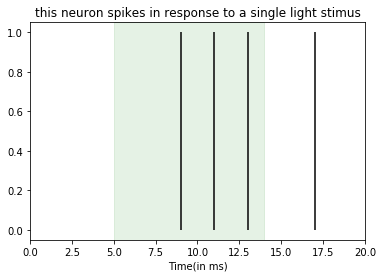

In [5]:
plt.subplot(111)
plt.vlines(spike_time, 0, 1)
plt.axvspan(5, 14, alpha = 0.1, color='g')
plt.xlim([0,20])
plt.title('this neuron spikes in response to a single light stimus')
plt.xlabel('Time(in ms)')

* original book has spike train matrix for ten neurons.
* but it is too annoying to type the whole array.
* so I generate the random data for spike train by binomial random function of numpy

In [6]:
import numpy as np

In [7]:
pre_stimulus = np.random.binomial(1, 0.01, [10, 5])
stimulus = np.random.binomial(1, 0.3, [10, 9])
post_stimulus = np.random.binomial(1, 0.1, [10, 7])

In [8]:
ten_spike_trains = np.hstack((pre_stimulus, stimulus, post_stimulus))

In [9]:
print(len(ten_spike_trains))
print(len(ten_spike_trains[0]))

10
21


([<matplotlib.axis.YTick at 0x7f431ee214a8>,
 <a list of 10 Text yticklabel objects>)

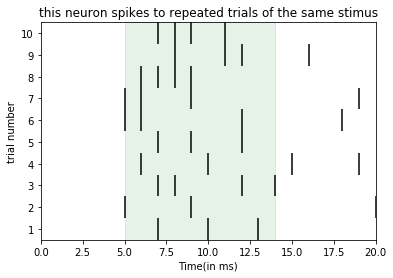

In [10]:
plt.subplot(1,1,1)
for trial in range(len(ten_spike_trains)):
    spike_time = [i for i, x in enumerate(ten_spike_trains[trial]) if x == 1]
    plt.vlines(spike_time, trial, trial + 1)
plt.axvspan(5, 14, alpha = 0.1, color='g')
plt.xlim([0,20])
plt.ylim([0,10])
plt.title('this neuron spikes to repeated trials of the same stimus')
plt.xlabel('Time(in ms)')
plt.ylabel('trial number')
plt.yticks([x + 0.5 for x in range(10)], [str(x + 1) for x in range(10)])

## Draw peri-stimulus time histogram(PSTH)

Text(0, 0.5, 'number of spike occurrences at this time')

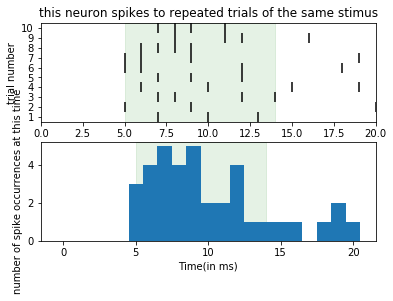

In [11]:

ax = plt.subplot(2,1,1) # number of row and column, order of plot
for trial in range(len(ten_spike_trains)):
    spike_time = [i for i, x in enumerate(ten_spike_trains[trial]) if x == 1]
    plt.vlines(spike_time, trial, trial + 1)
plt.axvspan(5, 14, alpha = 0.1, color='g')
plt.ylim([0, 10])
plt.xlim([0, 20])
plt.title('this neuron spikes to repeated trials of the same stimus')
plt.xlabel('Time(in ms)')
plt.ylabel('trial number')
plt.yticks([x + 0.5 for x in range(10)], [str(x + 1) for x in range(10)])
ax = plt.subplot(2,1,2) # number of row and column, order of plot
plt.axvspan(5, 14, alpha = 0.1, color='g')
ax.bar(range(21), np.sum(ten_spike_trains, 0), 1) # sum across the trial
plt.xlabel('Time(in ms)')
plt.ylabel('number of spike occurrences at this time')


Text(0.5, 1.0, 'Spike probability given 10 stimus trials')

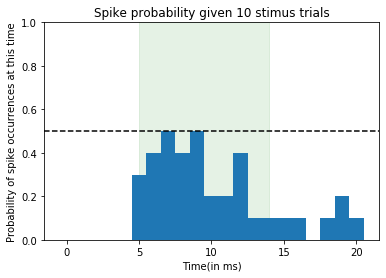

In [12]:
plt.axvspan(5, 14, alpha = 0.1, color='g')
plt.bar(range(21), np.mean(ten_spike_trains, 0), 1) # sum across the trial
plt.xlabel('Time(in ms)')
plt.ylim([0, 1])
plt.axhline(y=0.5, xmin =0, xmax=20, linestyle='--', color='k')
plt.ylabel('Probability of spike occurrences at this time')
plt.title('Spike probability given 10 stimus trials')

## Load data prepared by author from the [companion site](https://www.elsevier.com/books-and-journals/book-companion/9780128040430/chapter-files#Chapter%20Files)

In [13]:
import pickle

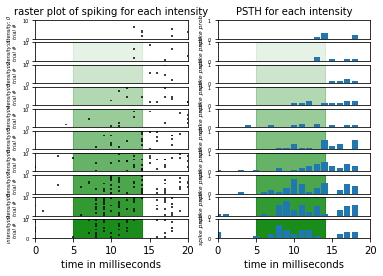

In [64]:
with open('./NDS Files for Download/tenIntensities.pkl', 'rb') as handle:
    ten_intensities = pickle.load(handle,  encoding='latin1') # without encoding argument, you might encounter the ascii code error.
fig = plt.figure()
num_intensities = len(ten_intensities)
nbar={} # initialzed nbar as dictionary
for key in ten_intensities.keys():
    ax=plt.subplot(num_intensities,2,float(key[0])*2+1) # total row = 10 tensity, 2 column, each plot from 1(not 0)
    total_trials = len(ten_intensities[key])
    for trial in range(total_trials): # this relies on there being 10 trials per stimulus intensit
        plt.vlines(ten_intensities[key][trial],trial,trial+1) # plot raster plot with vertical line
    plt.xlim([0,20]);plt.ylim([0,10])
    plt.ylabel('intensity: '+str(key[0])+'\ntrial # ',style='italic',fontsize=5)
    plt.yticks(fontsize=5)
    plt.axvspan(5,14,alpha=0.1*float(key[0]),color='g')
    if float(key[0]) < 9:
        plt.xlabel('');plt.xticks([])
    else:
        plt.xlabel('time in milliseconds')
    if float(key[0]) == 0:
        plt.title('raster plot of spiking for each intensity',fontsize=10)
    ax=plt.subplot(num_intensities,2,float(key[0])*2+2)
    plt.axvspan(5,14,alpha=0.1*float(key[0]),color='g')
    spike_times = [spike_time for trials in ten_intensities[key] for spike_time in trials]
    n_out,bins=np.histogram(spike_times,bins=range(20))
    nbar[float(key[0])] = n_out/float(total_trials) # this line not for draw this figure, but for next intensity plot
    plt.bar(bins[:-1],n_out/float(total_trials))
    plt.xlim([0,20]); plt.ylim([0,1])
    plt.yticks(fontsize=5)
    plt.ylabel('spike prob',style='italic',fontsize = 6)
    if float(key[0]) == 0:
        plt.title('PSTH for each intensity',fontsize=10)
    if float(key[0]) < num_intensities-1:
        plt.xlabel(''); plt.xticks([])
    else:
        plt.xlabel('time in milliseconds')

In [116]:
new_nbar = nbar[0]
for key in range(9): # rearrange the array according to the intensity of stimulus
    new_nbar = np.vstack((new_nbar, nbar[key+1])) 

Text(0, 0.5, 'mean spikes per time bin')

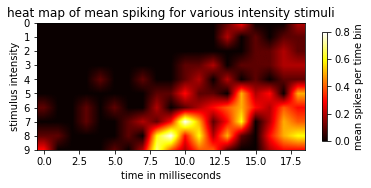

In [117]:
# Begin the Python way for Figure 3.10
fig = plt.figure()
ax = plt.subplot(1, 1, 1)
aa = ax.imshow(new_nbar,cmap='hot', interpolation='bilinear')
plt.yticks([x for x in range(10)],[str(x) for x in range(10)])
plt.ylabel('stimulus intensity')
plt.xlabel('time in milliseconds')
plt.title('heat map of mean spiking for various intensity stimuli')
cb = fig.colorbar(aa,shrink=0.5) 
cb.ax.set_ylabel('mean spikes per time bin') 

([], <a list of 0 Text xticklabel objects>)

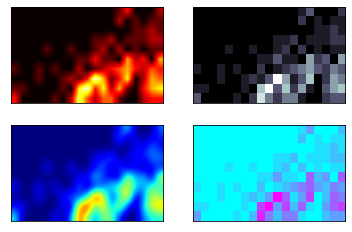

In [121]:
fig = plt.figure(); ax = plt.subplot(2,2,1)
aa = ax.imshow(new_nbar,cmap='hot' ,interpolation='bilinear',aspect=1.2) 
plt.yticks([]); plt.xticks([])
ax = plt.subplot(2,2,2)
aa = ax.imshow(new_nbar,cmap='bone', interpolation='nearest',aspect=1.2) 
plt.yticks([]); plt.xticks([])
ax = plt.subplot(2,2,3);
aa = ax.imshow(new_nbar,cmap='jet', interpolation='bicubic',aspect=1.2) 
plt.yticks([]); plt.xticks([])
ax = plt.subplot(2,2,4)
aa = ax.imshow(new_nbar,cmap='cool', interpolation='nearest',aspect=1.2)
plt.yticks([]); plt.xticks([])